# Here I will do ML through proper pattern
### A full fledge method to represent a model on particular data set

## 1- Import Libraraies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing,svm
from sklearn.preprocessing import RobustScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

## 2- Import Dataset

In [2]:
df = pd.read_csv("covid.csv")

## 3- Explanatory Data

### @- Now I will explain the dataset

### 3.1 View Dimensions of dataset

In [3]:
print("The dimensions of the corona virus dataset",df.shape)

The dimensions of the corona virus dataset (566602, 23)


### 3.2 Preview data set

In [4]:
print(df.head())

       id  sex  patient_type  entry_date date_symptoms   date_died  intubed  \
0  16169f    2             1  04-05-2020    02-05-2020  9999-99-99       97   
1  1009bf    2             1  19-03-2020    17-03-2020  9999-99-99       97   
2  167386    1             2  06-04-2020    01-04-2020  9999-99-99        2   
3  0b5948    2             2  17-04-2020    10-04-2020  9999-99-99        2   
4  0d01b5    1             2  13-04-2020    13-04-2020  22-04-2020        2   

   pneumonia  age  pregnancy  ...  inmsupr  hypertension  other_disease  \
0          2   27         97  ...        2             2              2   
1          2   24         97  ...        2             2              2   
2          2   54          2  ...        2             2              2   
3          1   30         97  ...        2             2              2   
4          2   60          2  ...        2             1              2   

   cardiovascular  obesity  renal_chronic  tobacco  contact_other_covid  \

### 3.3 Rename the columns
#### Because we are seen that the name of columns are not in proper way so we sould first rename them 

In [5]:
col_name = ['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu']
df.columns = col_name
df.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu'],
      dtype='object')

### 3.4 View Summary of dataset 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
id                     566602 non-null object
sex                    566602 non-null int64
patient_type           566602 non-null int64
entry_date             566602 non-null object
date_symptoms          566602 non-null object
date_died              566602 non-null object
intubed                566602 non-null int64
pneumonia              566602 non-null int64
age                    566602 non-null int64
pregnancy              566602 non-null int64
diabetes               566602 non-null int64
copd                   566602 non-null int64
asthma                 566602 non-null int64
inmsupr                566602 non-null int64
hypertension           566602 non-null int64
other_disease          566602 non-null int64
cardiovascular         566602 non-null int64
obesity                566602 non-null int64
renal_chronic          566602 non-null int64
tobacco                566602 

### Findings
             1-We can see that the dataset contains 4 character variables and 19 numerical variables.
             2-There can be various cols served as the target variable.eg diabetes, pneumonia, asthma, icu, obesity
             3-There are no missing values in the dataset. I will explore this later,

### 3. 5 Check the data types of columns 
             1-The above df.info() command gives us the number of filled values along with the data types of columns.
             2-If we simply want to check the data type of a particular column, we can use the following command.

In [7]:
df.dtypes

id                     object
sex                     int64
patient_type            int64
entry_date             object
date_symptoms          object
date_died              object
intubed                 int64
pneumonia               int64
age                     int64
pregnancy               int64
diabetes                int64
copd                    int64
asthma                  int64
inmsupr                 int64
hypertension            int64
other_disease           int64
cardiovascular          int64
obesity                 int64
renal_chronic           int64
tobacco                 int64
contact_other_covid     int64
covid_res               int64
icu                     int64
dtype: object

### 3.6 View Statistical properties of dataset

In [8]:
df.describe().T # df.describe() is same as listed command 

count       mean        std  min   25%   50%   75%  \
sex                  566602.0   1.506726   0.499955  1.0   1.0   2.0   2.0   
patient_type         566602.0   1.215165   0.410937  1.0   1.0   1.0   1.0   
intubed              566602.0  76.562952  39.058676  1.0  97.0  97.0  97.0   
pneumonia            566602.0   1.846262   0.560939  1.0   2.0   2.0   2.0   
age                  566602.0  42.622483  16.659973  0.0  31.0  41.0  53.0   
pregnancy            566602.0  50.400692  47.501579  1.0   2.0  97.0  97.0   
diabetes             566602.0   2.210633   5.683523  1.0   2.0   2.0   2.0   
copd                 566602.0   2.280221   5.327832  1.0   2.0   2.0   2.0   
asthma               566602.0   2.265029   5.334658  1.0   2.0   2.0   2.0   
inmsupr              566602.0   2.319628   5.667381  1.0   2.0   2.0   2.0   
hypertension         566602.0   2.145774   5.459866  1.0   2.0   2.0   2.0   
other_disease        566602.0   2.410030   6.489959  1.0   2.0   2.0   2.0   
cardiovascular       566602.0   2.286157   5.438405  1.0   2.0   2.0   2.0   
obesity              566602.0   2.138905   5.395578  1.0   2.0   2.0   2.0   
renal_chronic        566602.0   2.283765   5.393232  1.0   2.0   2.0   2.0   
tobacco              566602.0   2.238360   5.571901  1.0   2.0   2.0   2.0   
contact_other_covid  566602.0  31.573034  45.082123  1.0   1.0   2.0  99.0   
covid_res            566602.0   1.728651   0.658710  1.0   1.0   2.0   2.0   
icu                  566602.0  76.562864  39.059060  1.0  97.0  97.0  97.0   

                       max  
sex                    2.0  
patient_type           2.0  
intubed               99.0  
pneumonia             99.0  
age                  120.0  
pregnancy             98.0  
diabetes              98.0  
copd                  98.0  
asthma                98.0  
inmsupr               98.0  
hypertension          98.0  
other_disease         98.0  
cardiovascular        98.0  
obesity               98.0  
renal_chronic         98.0  
tobacco               98.0  
contact_other_covid   99.0  
covid_res              3.0  
icu                   99.0

### Important points to note
            1-The above command df.describe() helps us to view the statistical properties of numerical variables.
            2-If we want to view the statistical properties of character variables, we should run the following command -
              `df.describe(include=['object'])`
            3-If we want to view the statistical properties of all the variables, we should run the following command -
              `df.describe(include='all')`

In [9]:
df.describe(include='all')

id            sex   patient_type  entry_date date_symptoms  \
count     566602  566602.000000  566602.000000      566602        566602   
unique    563201            NaN            NaN         181           181   
top     0.00E+00            NaN            NaN  15-06-2020    01-06-2020   
freq         210            NaN            NaN       13261         13860   
mean         NaN       1.506726       1.215165         NaN           NaN   
std          NaN       0.499955       0.410937         NaN           NaN   
min          NaN       1.000000       1.000000         NaN           NaN   
25%          NaN       1.000000       1.000000         NaN           NaN   
50%          NaN       2.000000       1.000000         NaN           NaN   
75%          NaN       2.000000       1.000000         NaN           NaN   
max          NaN       2.000000       2.000000         NaN           NaN   

         date_died        intubed      pneumonia            age  \
count       566602  566602.000000  566602.000000  566602.000000   
unique         124            NaN            NaN            NaN   
top     9999-99-99            NaN            NaN            NaN   
freq        530426            NaN            NaN            NaN   
mean           NaN      76.562952       1.846262      42.622483   
std            NaN      39.058676       0.560939      16.659973   
min            NaN       1.000000       1.000000       0.000000   
25%            NaN      97.000000       2.000000      31.000000   
50%            NaN      97.000000       2.000000      41.000000   
75%            NaN      97.000000       2.000000      53.000000   
max            NaN      99.000000      99.000000     120.000000   

            pregnancy  ...        inmsupr   hypertension  other_disease  \
count   566602.000000  ...  566602.000000  566602.000000  566602.000000   
unique            NaN  ...            NaN            NaN            NaN   
top               NaN  ...            NaN            NaN            NaN   
freq              NaN  ...            NaN            NaN            NaN   
mean        50.400692  ...       2.319628       2.145774       2.410030   
std         47.501579  ...       5.667381       5.459866       6.489959   
min          1.000000  ...       1.000000       1.000000       1.000000   
25%          2.000000  ...       2.000000       2.000000       2.000000   
50%         97.000000  ...       2.000000       2.000000       2.000000   
75%         97.000000  ...       2.000000       2.000000       2.000000   
max         98.000000  ...      98.000000      98.000000      98.000000   

        cardiovascular        obesity  renal_chronic        tobacco  \
count    566602.000000  566602.000000  566602.000000  566602.000000   
unique             NaN            NaN            NaN            NaN   
top                NaN            NaN            NaN            NaN   
freq               NaN            NaN            NaN            NaN   
mean          2.286157       2.138905       2.283765       2.238360   
std           5.438405       5.395578       5.393232       5.571901   
min           1.000000       1.000000       1.000000       1.000000   
25%           2.000000       2.000000       2.000000       2.000000   
50%           2.000000       2.000000       2.000000       2.000000   
75%           2.000000       2.000000       2.000000       2.000000   
max          98.000000      98.000000      98.000000      98.000000   

        contact_other_covid      covid_res            icu  
count         566602.000000  566602.000000  566602.000000  
unique                  NaN            NaN            NaN  
top                     NaN            NaN            NaN  
freq                    NaN            NaN            NaN  
mean              31.573034       1.728651      76.562864  
std               45.082123       0.658710      39.059060  
min                1.000000       1.000000       1.000000  
25%                1.000000       1.000000      97.000000  
50

### 3.7 Check for missing values 
        Pandas isnull() and notnull() functions
          1- Pandas offers two functions to test for missing values - isnull() and notnull().
          2- These are simple functions that return a boolean value indicating whether the passed in argument value is empty
        Below, I will list some useful commands to deal with missing values.

#### Useful commands to detect missing values
    1-df.isnull()
        The above command checks whether each cell in a dataframe contains missing values or not.

    2-df.isnull().sum()
        The above command returns total number of missing values in each column in the dataframe.

    3-df.isnull().sum().sum()
        It returns total number of missing values in the dataframe.

    4-df.isnull().mean()
        It returns percentage of missing values in each column in the dataframe.

    5-df.isnull().any()
        It checks which column has null values and which has not. 
        
    6-df.isnull().any().any()
        It returns a boolean value indicating whether the dataframe has missing values or not. 

    7-df.isnull().values.any()
        It checks whether a particular column has missing values or not. 
    
    8-df.isnull().values.sum()
        It returns the total number of missing values in the dataframe.

In [10]:
df.isnull().sum()
df.replace({97:np.nan,98:np.nan,99:np.nan},inplace=True) # because these are garbage values
df.dropna(inplace=True)
print(df.shape)

(23133, 23)


#### We can see that there is no missing value in the dataset

### 3.8 Check with ASSERT statement 
        @_We must confirm that our dataset has no missing values.
        @_We can write an Assert statement to verify this.
        @_We can use an assert statement to programmatically check that no missing.
        @_This gives us confidence that our code is running properly.

    assert 1 == 1 (return Nothing if the value is True)
    assert 1 == 2 (return AssertionError if the value is False)

In [11]:
assert pd.notnull(df).all().all()

We can see that assert statment did not through the exception so that there is no missing value in our dataframe

## 4- Exploring Categorical Variables

#### 4.1- Finding Categorical Variables

In [12]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 4 categorical variables

The categorical variables are :

 ['id', 'entry_date', 'date_symptoms', 'date_died']


#### 4.2- Preview Categorical Variables

In [13]:
df[categorical].head()

id  entry_date date_symptoms   date_died
21  154fea  02-06-2020    02-06-2020  9999-99-99
30  16e14e  22-06-2020    17-06-2020  9999-99-99
71  149f1c  17-06-2020    12-06-2020  9999-99-99
79  1d5df2  08-06-2020    07-06-2020  9999-99-99
93  18f860  27-05-2020    27-05-2020  9999-99-99

#### 4.3- Frequency distribution in categorical variables

In [14]:
for i in categorical:
    if i=='id':
        continue
    print(df[i].value_counts())

22-06-2020    456
16-06-2020    443
08-06-2020    442
15-06-2020    429
10-06-2020    422
             ... 
06-03-2020      1
10-03-2020      1
25-02-2020      1
14-03-2020      1
14-02-2020      1
Name: entry_date, Length: 119, dtype: int64
01-06-2020    546
10-06-2020    460
15-06-2020    458
20-06-2020    447
20-05-2020    426
             ... 
30-01-2020      1
25-02-2020      1
13-02-2020      1
24-01-2020      1
27-02-2020      1
Name: date_symptoms, Length: 132, dtype: int64
9999-99-99    19117
01-06-2020       81
18-05-2020       81
10-06-2020       80
08-06-2020       77
              ...  
27-03-2020        2
26-03-2020        1
29-03-2020        1
23-03-2020        1
28-03-2020        1
Name: date_died, Length: 99, dtype: int64


#### 4.4- Percentage of frequency distribution in variables

In [15]:
for i in categorical:
    if i =='id':
        continue
    print(df[i].value_counts()/np.float(len(df[i])))

22-06-2020    0.019712
16-06-2020    0.019150
08-06-2020    0.019107
15-06-2020    0.018545
10-06-2020    0.018242
                ...   
06-03-2020    0.000043
10-03-2020    0.000043
25-02-2020    0.000043
14-03-2020    0.000043
14-02-2020    0.000043
Name: entry_date, Length: 119, dtype: float64
01-06-2020    0.023603
10-06-2020    0.019885
15-06-2020    0.019799
20-06-2020    0.019323
20-05-2020    0.018415
                ...   
30-01-2020    0.000043
25-02-2020    0.000043
13-02-2020    0.000043
24-01-2020    0.000043
27-02-2020    0.000043
Name: date_symptoms, Length: 132, dtype: float64
9999-99-99    0.826395
01-06-2020    0.003501
18-05-2020    0.003501
10-06-2020    0.003458
08-06-2020    0.003329
                ...   
27-03-2020    0.000086
26-03-2020    0.000043
29-03-2020    0.000043
23-03-2020    0.000043
28-03-2020    0.000043
Name: date_died, Length: 99, dtype: float64


Comment:
    As it can be seen that there is no missing value other than NAN or None in the dataframe, so we can do further things

## 5- Lets Explore the target variables(pneumonia, asthma, diabetes, icu)

#### 5.1 Penumonia exploration

In [16]:
df['pneumonia'].isnull().sum()

0

In [17]:
df['pneumonia'].nunique()

2

In [18]:
df['pneumonia'].unique()

array([2., 1.])

In [19]:
df['pneumonia'].value_counts()

1.0    14998
2.0     8135
Name: pneumonia, dtype: int64

#### 5.2 Asthma explortion

In [20]:
df['asthma'].isnull().sum()

0

In [21]:
df['asthma'].nunique()

2

In [22]:
df['asthma'].unique()

array([2., 1.])

As we are seen that '98' is garbage value because 1=asthma patients and 2=patients with negative asthma

In [23]:
df['asthma'].value_counts()

2.0    22346
1.0      787
Name: asthma, dtype: int64

#### 5.3 Diabeties Exploration

In [24]:
df['diabetes'].isnull().sum()

0

In [25]:
df['diabetes'].nunique()

2

In [26]:
df['diabetes'].unique()

array([2., 1.])

As we are seen that '98' is garbage value because 1=diabetes patients and 2=patients with negative diabetes

In [27]:
df['diabetes'].value_counts()

2.0    16384
1.0     6749
Name: diabetes, dtype: int64

#### 5.4 icu Exploration

In [28]:
df['icu'].isnull().sum()

0

In [29]:
df['icu'].nunique()

2

In [30]:
df['icu'].unique()

array([2., 1.])

As we are seen that '97 , 99' are garbage value because 1=patients will attend icu and 2=patients will not attend icu

In [31]:
df['icu'].value_counts()

2.0    20438
1.0     2695
Name: icu, dtype: int64

## 6- Visualization and plotting of target variables

#### 6.1 Pneumonia Varibles

In [32]:

df['sex'].unique()

array([1.])

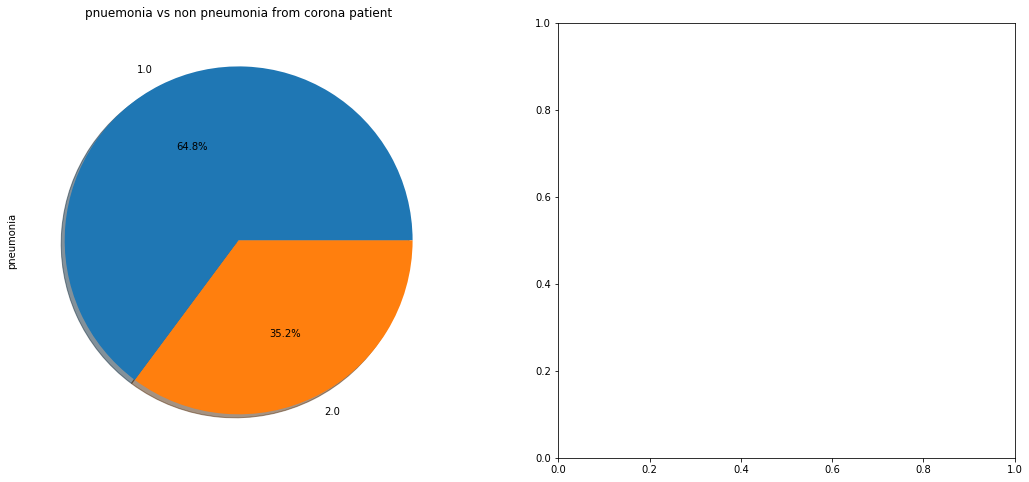

In [33]:
# frequency plot of pneumonia patients
f,ax=plt.subplots(1,2,figsize=(18,8))

ax = df['pneumonia'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax.set_title('pnuemonia vs non pneumonia from corona patient')

plt.show()


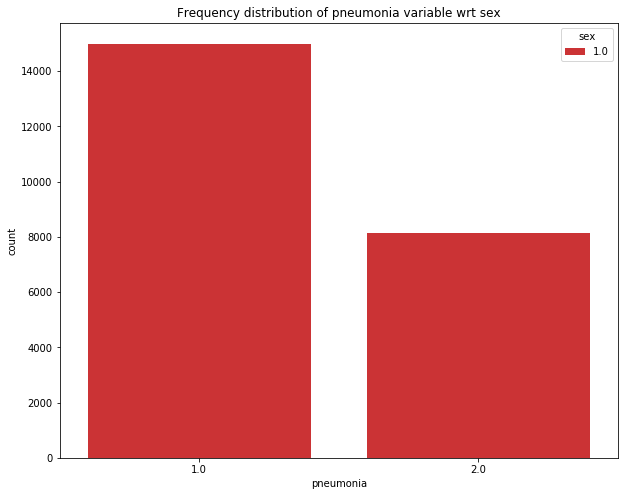

In [34]:
# Male vs female

f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="pneumonia", hue="sex", data=df, palette="Set1")
ax.set_title("Frequency distribution of pneumonia variable wrt sex")
plt.show()

#### 6.2 Asthma variable

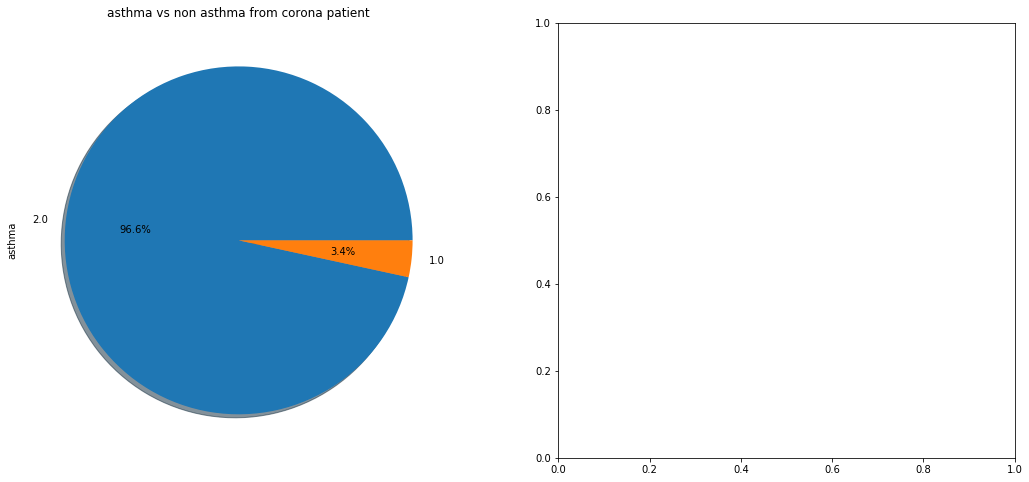

In [35]:
f,ax=plt.subplots(1,2,figsize=(18,8))

ax = df['asthma'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax.set_title('asthma vs non asthma from corona patient')

plt.show()


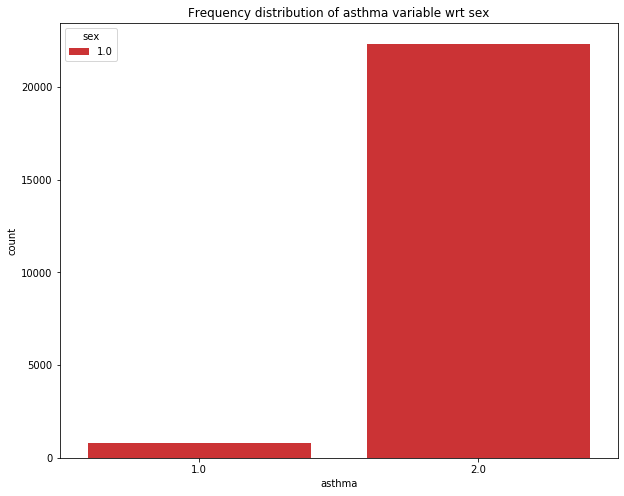

In [36]:
# Male vs female 
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="asthma", hue="sex", data=df, palette="Set1")
ax.set_title("Frequency distribution of asthma variable wrt sex")
plt.show()

#### 6.3 Diabetes variable

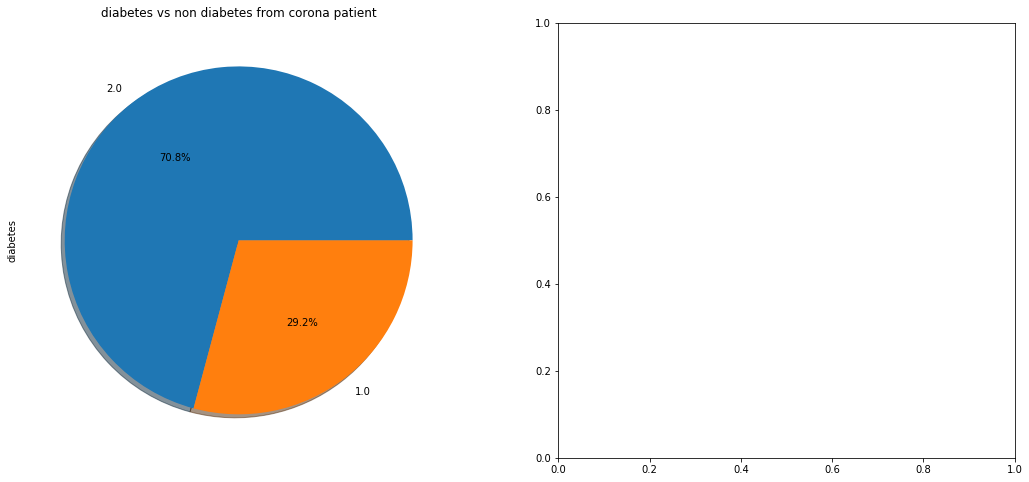

In [37]:
f,ax=plt.subplots(1,2,figsize=(18,8))

ax = df['diabetes'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax.set_title('diabetes vs non diabetes from corona patient')

plt.show()


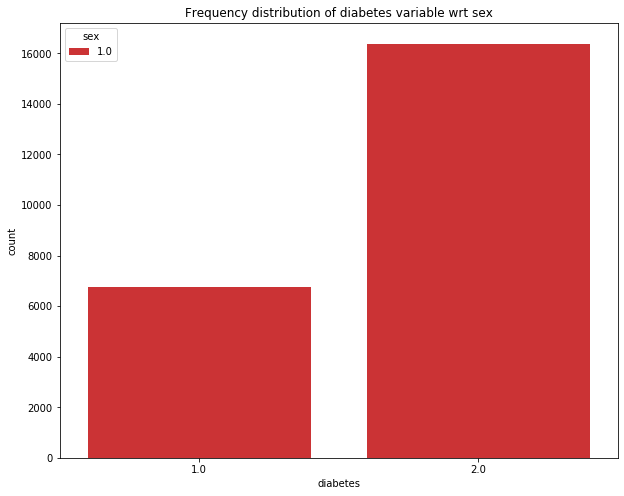

In [38]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="diabetes", hue="sex", data=df, palette="Set1")
ax.set_title("Frequency distribution of diabetes variable wrt sex")
plt.show()

#### 6.4 Distribution of age variable

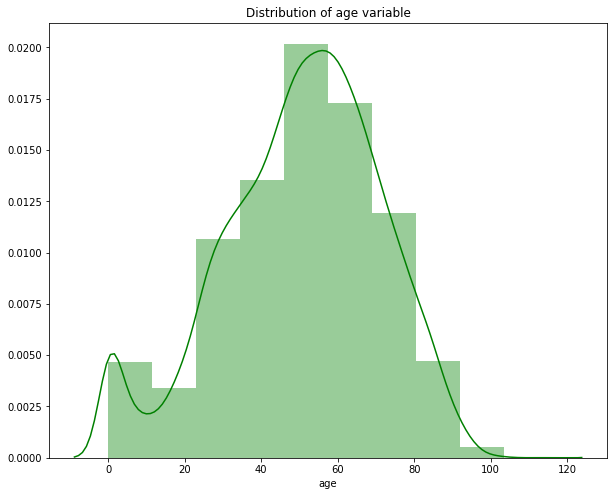

In [39]:
f, ax = plt.subplots(figsize=(10,8))
x = df['age']
ax = sns.distplot(x, bins=10, color='green')
ax.set_title("Distribution of age variable")
plt.show()

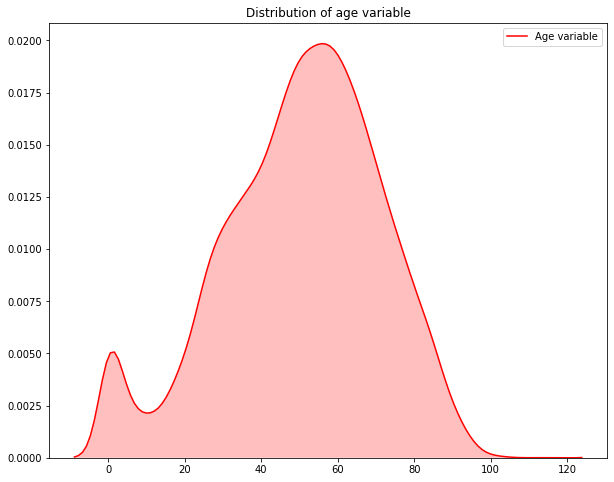

In [40]:
f, ax = plt.subplots(figsize=(10,8))
x = df['age']
x = pd.Series(x, name="Age variable")
ax = sns.kdeplot(x, shade=True, color='red')
ax.set_title("Distribution of age variable")
plt.show()

We can see that the age of corona patient is more like to normalize

#### 6.4 Distribution of patients who attended icu and not

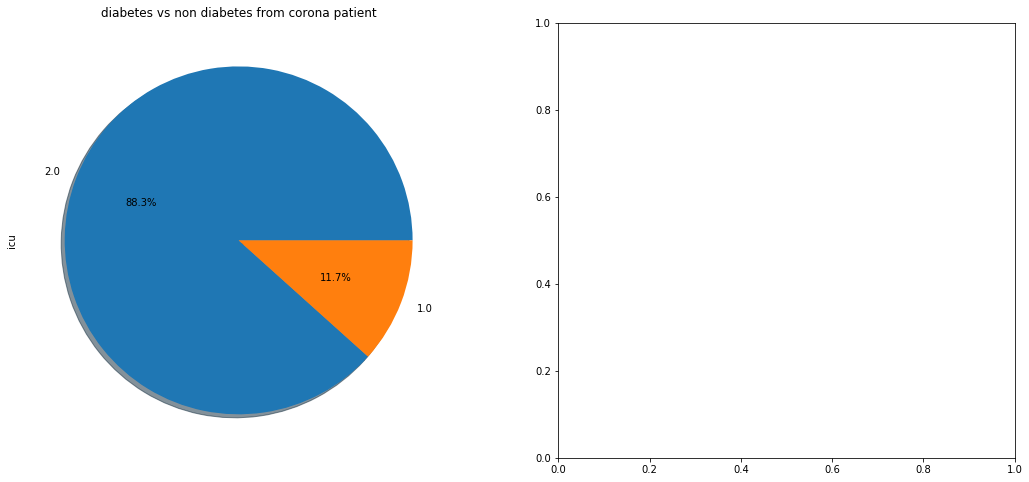

In [41]:
f,ax=plt.subplots(1,2,figsize=(18,8))

ax = df['icu'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax.set_title('diabetes vs non diabetes from corona patient')

plt.show()


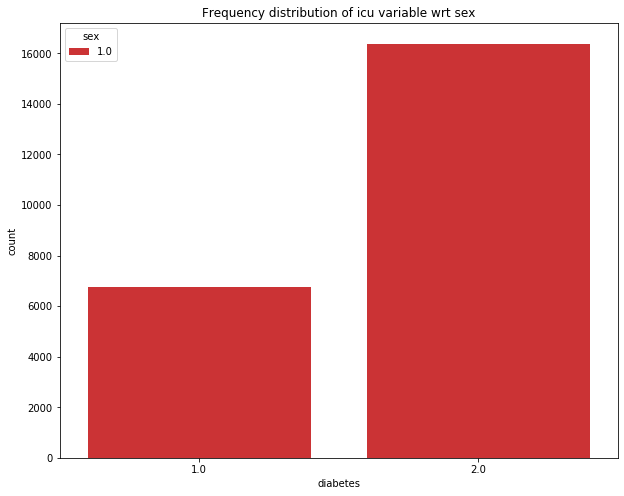

In [42]:
# male vs female distribution
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="diabetes", hue="sex", data=df, palette="Set1")
ax.set_title("Frequency distribution of icu variable wrt sex")
plt.show()

## 7 Declare Target Variables

### 7.1- Declare targets for diseases variables

In [43]:
# Here we have two data frame diseases_df and df
# diseases df having all non null cases of pneumonia, asthma and diabeties
# while df has all the non null cases who are related to go in icu or not.
# So we begins with disease selction first.
# lets drop the categorical columns beacuse dates & id  have no significant effect on classifying about diseases

df.drop(['id','entry_date', 'date_symptoms','date_died'], axis=1,inplace=True)



#### 7.1.1 Preparing inputs for icu(rquire to Attend or not) classification and neural network

C:\Users\Hassan X\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Acuuracy of predicted icu patients  0.8864553314121038
Confusion matrix

 [[ 215  604]
 [ 184 5937]]
              precision    recall  f1-score   support

         1.0       0.54      0.26      0.35       819
         2.0       0.91      0.97      0.94      6121

    accuracy                           0.89      6940
   macro avg       0.72      0.62      0.65      6940
weighted avg       0.86      0.89      0.87      6940



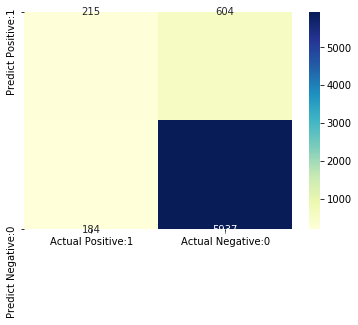

In [44]:
X = np.array(df.drop(['icu'],axis=1,inplace=False))
y = np.array(df['icu'])

scaler = RobustScaler()
X=scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
#clf = svm.SVC().fit(X_train, y_train)
#clf = RandomForestClassifier(max_depth=2, random_state=0)
#clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


print("Acuuracy of predicted icu patients ",clf.score(X_test,y_test))
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

print(classification_report(y_test, y_pred))